In [1]:
import numpy as np 
import math
import time
from numpy.ma.core import ceil
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation, colors
from sklearn.cluster import KMeans
from sklearn import preprocessing as sk_preprocessing
from sklearn.preprocessing import StandardScaler #normalization
from sklearn.preprocessing import MinMaxScaler #normalization
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from scipy.spatial import distance #distance calculation
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("/Users/alsabbaghs/Downloads/DryBeanDataset/Dry_Bean_Dataset.xlsx")
df.head()
df["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [3]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [4]:
X = df.drop('Class', axis = 1)
Y = df['Class']

standard_scaler = StandardScaler()
standard_scaler.fit(X)
X_normalized = standard_scaler.transform(X)
print(X_normalized)

Y_numerized = Y.replace(({'SEKER': 4, 'BARBUNYA' : 2, 'BOMBAY': 3, 'CALI': 0, 'DERMASON': 1, 'HOROZ': 6, 'SIRA': 5}))
print(Y_numerized)

[[-0.84074853 -1.1433189  -1.30659814 ...  2.40217287  1.92572347
   0.83837103]
 [-0.82918764 -1.01392388 -1.39591111 ...  3.10089314  2.68970162
   0.77113842]
 [-0.80715717 -1.07882906 -1.25235661 ...  2.23509147  1.84135576
   0.91675514]
 ...
 [-0.37203825 -0.44783294 -0.45047814 ...  0.28920441  0.33632829
   0.39025114]
 [-0.37176543 -0.42702856 -0.42897404 ...  0.22837538  0.2489734
   0.03644001]
 [-0.37135619 -0.38755718 -0.2917356  ... -0.12777587 -0.2764814
   0.71371948]]
0        4
1        4
2        4
3        4
4        4
        ..
13606    1
13607    1
13608    1
13609    1
13610    1
Name: Class, Length: 13611, dtype: int64


In [5]:
df['Numerized'] = Y_numerized
print(df)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

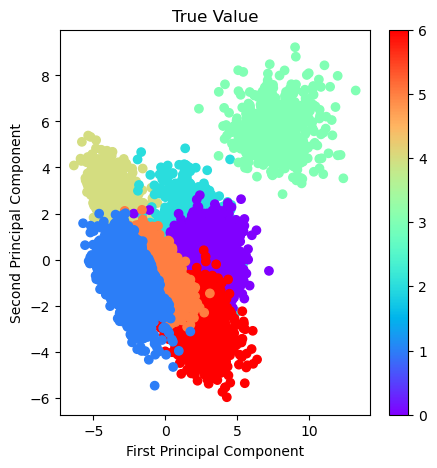

In [6]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_normalized)

fig, ax = plt.subplots(figsize=(5, 5))
scatter = ax.scatter(principalComponents[:, 0], principalComponents[:, 1], c = Y_numerized, cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('True Value')
plt.colorbar(scatter)
plt.show()

In [7]:
# Each row of pca.components_ represents a principal component, 
# and the columns represent the original features of the dataset. 
# The values in each row indicate the correlation between each feature and the principal component, 
# which can be used to interpret the contribution of each feature to the component.

print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 0.28245796  0.31089112  0.32582398  0.23619938  0.22929833  0.23152605
   0.28319989  0.29748384 -0.05980796 -0.14301631 -0.24816481 -0.238378
  -0.2213189  -0.31462459 -0.2389833  -0.19800943]
 [ 0.24588202  0.17930292  0.10075652  0.34346065 -0.33084419 -0.31943388
   0.24463007  0.22280218  0.22061926  0.10332234  0.21480528  0.32891436
  -0.33254851  0.12941924  0.32752166  0.10006108]
 [-0.06144668 -0.01885259 -0.08469191  0.00750039 -0.16905801 -0.16304202
  -0.05364907 -0.04991355 -0.08525821 -0.73867023 -0.16332549  0.14970077
  -0.03262293  0.12007668  0.14957024 -0.53690306]
 [-0.03154619 -0.0424679  -0.00679308 -0.06129971  0.05364612  0.11838855
  -0.03095956 -0.03242739  0.94825427 -0.04954576  0.06748241 -0.08715557
   0.07233034 -0.04654382 -0.09567885 -0.2101199 ]
 [-0.09132562  0.08181987 -0.04421631 -0.00429258 -0.02475666 -0.06030396
  -0.08911337 -0.02195341  0.19759891 -0.28219437 -0.6487007   0.05859574
  -0.11290778 -0.02641416  0.06222695  0.64037169]]
[0.554

# SOMs

In [8]:
# Helper functions

# Data Normalization
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [9]:
#mian function

train_x_norm = minmax_scaler(principalComponents) # normalisation
data = minmax_scaler(principalComponents) # normalisation
# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)

accuracies = []

In [10]:
# hyperparameters  
grid = [[30, 30]]
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(150001)
loop = [500, 1000, 5000, 10000, 20000, 50000, 75000, 100000, 125000, 150000]

# num_nurons = 5*np.sqrt(train_x.shape[0])
# grid_size = ceil(np.sqrt(num_nurons))
# print(grid_size)

In [11]:
start_time = time.time()

for j in range(len(grid)):
  num_rows = grid[j][0]
  num_cols = grid[j][1]
  som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction
  print(f"Grid size: {num_rows} x {num_cols}")
    
  for step in range(max_steps):
    learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)
    t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    
    for row in range(num_rows):
      for col in range(num_cols):
        if m_distance([row,col],winner) <= neighbourhood_range:
          som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight
        
    for i in loop:
      if step == i:
        label_data = np.array(Y_numerized)
        map = np.empty(shape=(num_rows, num_cols), dtype=object)

        for row in range(num_rows):
          for col in range(num_cols):
            map[row][col] = [] # empty list to store the label

        for t in range(train_x_norm.shape[0]):
          winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
          map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron
        
        label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
        for row in range(num_rows):
          for col in range(num_cols):
            label_list = map[row][col]
            if len(label_list)==0:
              label = 2
            else:
              label = max(label_list, key=label_list.count)
            label_map[row][col] = label
        
        winner_labels = []

        for t in range(data.shape[0]):
          winner = winning_neuron(data, t, som, num_rows, num_cols)
          row = winner[0]
          col = winner[1]
          predicted = label_map[row][col]
          winner_labels.append(predicted)
        
        accuracy = accuracy_score(Y_numerized, np.array(winner_labels))
        print(f"- Accuracy at iteration {i}:", accuracy)
        accuracies.append(accuracy)
    
  print()

end_time = time.time()
elapsed_time = end_time - start_time

print("Elapsed time: {:.2f} seconds".format(elapsed_time))

Grid size: 30 x 30
- Accuracy at iteration 500: 0.8907501285724782
- Accuracy at iteration 1000: 0.8869296892219528
- Accuracy at iteration 5000: 0.8884725589596649
- Accuracy at iteration 10000: 0.8947909778855337
- Accuracy at iteration 20000: 0.8925134082727206
- Accuracy at iteration 50000: 0.8978767173609581
- Accuracy at iteration 75000: 0.9026522665491147
- Accuracy at iteration 100000: 0.9063992359121299
- Accuracy at iteration 125000: 0.9088972154874734
- Accuracy at iteration 150000: 0.9124972448754683

Elapsed time: 5123.20 seconds


In [12]:
#print(accuracies)
best_accuracy_som = max(accuracies)
print(f'The best accuracy for SOM is {round(best_accuracy_som*100, 2)}%')
index = accuracies.index(best_accuracy_som)
grid_size = grid[math.floor(index/10)]
best_iteration = loop[index%10]
print(f'The best grid size is {grid_size} at iteration {best_iteration}')

The best accuracy for SOM is 91.25%
The best grid size is [30, 30] at iteration 150000


In [13]:
cm = confusion_matrix(Y_numerized, np.array(winner_labels))
print(cm)

[[1516    0   50    0    2   25   37]
 [   0 3205    0    0   51  286    4]
 [  71    0 1198    0   13   32    8]
 [   0    0    0  522    0    0    0]
 [   1   53   17    0 1877   78    1]
 [  14  260   10    0   26 2284   42]
 [  33   17   14    0    0   46 1818]]


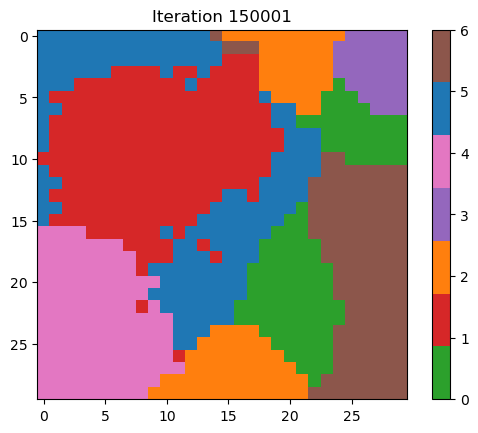

In [14]:
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange', 'tab:purple', 'tab:pink', 'tab:blue', 'tab:brown'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()